# dynamic OceanOptics measurements in python
### you have to install the library first: https://github.com/ap--/python-seabreeze
for OSX:
wget https://github.com/ap--/python-seabreeze/releases/download/python-seabreeze-v0.5.3/seabreeze-0.5.3-cp27-cp27m-macosx_10_6_intel.whl
pip install seabreeze-0.5.3-cp27-cp27m-macosx_10_6_intel.whl

In [1]:
import seabreeze.spectrometers as sb
import numpy as np
import time
from matplotlib import pyplot as plt
%matplotlib notebook

### Show connected Spectrometers

In [4]:
devices = sb.list_devices()
print(devices)

[<SeaBreezeDevice USB4000:USB4F06783>]


### Open Spectrometer and set integration time

In [5]:
int_time = 10000 # integration time in microseconds
spec = sb.Spectrometer(devices[0])
spec.integration_time_micros(30000)

define funtion that updates the plot with spectrometer data

In [6]:
def pltspectrum(ax, spec):
    x = spec.wavelengths()
    y = spec.intensities()
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            line.set_ydata(y)
    fig.canvas.draw()

random numbers for demonstration purposes

In [7]:
def pltrandom(ax):
    x = range(0,100)
    y = np.random.randint(0,100,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            line.set_ydata(y)
    fig.canvas.draw()

generate plot and populate it with inital measurement

<IPython.core.display.Javascript object>


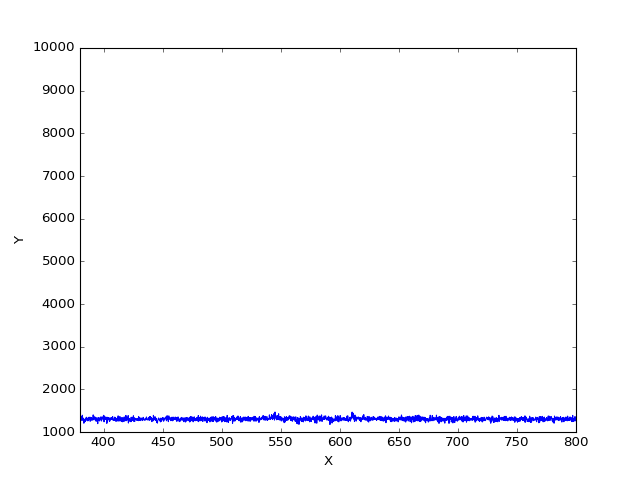

In [12]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(380,800)
ax.set_ylim(1000,10000)
plt.plot(spec.wavelengths(),spec.intensities())

start measurement for n measurements an wait in between each measurement 3 times the integration time (only good for fast updates)

In [13]:
for f in range(50):
    #pltrandom(ax)
    pltspectrum(ax, spec)
    time.sleep(int_time*3)